In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
import torch
import os
import pickle
from itertools import product

from torch.utils.tensorboard import SummaryWriter

np.random.seed(101)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
os.chdir('/content/drive/MyDrive/ML Project CS6140/Assignment 4')

In [4]:
ratings_df = pd.read_csv('ml-latest-small/ratings.csv')
movies_df = pd.read_csv('ml-latest-small/movies.csv')

In [5]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
ratings_df[ratings_df['rating'] == 0.0]

,userId,movieId,rating,timestamp


In [7]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [8]:
data = pd.merge(ratings_df, movies_df, on= ['movieId'])

In [9]:
data.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [10]:
X_matrix_data = pd.pivot_table(data, values='rating', index='userId', columns='movieId')

In [11]:
X_matrix_data

movieId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,34,36,38,39,40,41,42,43,...,185135,185435,185473,185585,186587,187031,187541,187593,187595,187717,188189,188301,188675,188751,188797,188833,189043,189111,189333,189381,189547,189713,190183,190207,190209,190213,190215,190219,190221,191005,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.5,NaN,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,2.5,NaN,NaN,NaN,3.5,NaN,4.0,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,4.5,NaN,NaN,4.0,NaN,3.5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,2.5,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,4.5,NaN,NaN,2.0,NaN,3.5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.5,3.5,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
X_matrix = X_matrix_data.values

In [13]:
X_matrix

array([[4. , nan, 4. , ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [2.5, 2. , 2. , ..., nan, nan, nan],
       [3. , nan, nan, ..., nan, nan, nan],
       [5. , nan, nan, ..., nan, nan, nan]])

In [14]:
weight_cost = np.array(~np.isnan(X_matrix), dtype=np.float64)

In [15]:
weight_cost

array([[1., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [16]:
X_matrix_no_nan = np.nan_to_num(X_matrix, nan=0.0)

In [17]:
np.count_nonzero(X_matrix_no_nan)

100836

In [ ]:
data_size = np.count_nonzero(X_matrix_no_nan)

In [ ]:
data_size*0.25

25209.0

In [ ]:
count_df_5 = ratings_df['movieId'].value_counts() > 5

In [ ]:
test_index_df = ratings_df[ratings_df.movieId.isin(count_df_5[count_df_5 == True].index)].sample(n=int(data_size*0.25)).copy()

In [19]:
test_index_df = pd.read_csv('test_index_data.csv')

In [20]:
ratings_df.loc[list(test_index_df.index),'rating'] = 0.0

In [21]:
ratings_df.loc[list(test_index_df.index),'rating']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
25204    0.0
25205    0.0
25206    0.0
25207    0.0
25208    0.0
Name: rating, Length: 25209, dtype: float64

In [22]:
data = pd.merge(ratings_df, movies_df, on= ['movieId'])

In [23]:
data.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,0.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,0.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,0.0,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,0.0,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,0.0,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [24]:
X_matrix_data = pd.pivot_table(data, values='rating', index='userId', columns='movieId')

In [25]:
X_matrix_data

movieId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,34,36,38,39,40,41,42,43,...,185135,185435,185473,185585,186587,187031,187541,187593,187595,187717,188189,188301,188675,188751,188797,188833,189043,189111,189333,189381,189547,189713,190183,190207,190209,190213,190215,190219,190221,191005,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.5,NaN,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,2.5,NaN,NaN,NaN,3.5,NaN,4.0,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,4.5,NaN,NaN,4.0,NaN,3.5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,2.5,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,4.5,NaN,NaN,2.0,NaN,3.5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.5,3.5,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
X_matrix = X_matrix_data.values

In [27]:
X_matrix

array([[0. , nan, 0. , ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [2.5, 2. , 2. , ..., nan, nan, nan],
       [3. , nan, nan, ..., nan, nan, nan],
       [5. , nan, nan, ..., nan, nan, nan]])

In [28]:
weight_cost = np.array(~np.isnan(X_matrix), dtype=np.float64)

In [29]:
weight_cost

array([[1., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [30]:
X_matrix_no_nan = np.nan_to_num(X_matrix, nan=0.0)

In [31]:
X_matrix_no_nan

array([[0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       ...,
       [2.5, 2. , 2. , ..., 0. , 0. , 0. ],
       [3. , 0. , 0. , ..., 0. , 0. , 0. ],
       [5. , 0. , 0. , ..., 0. , 0. , 0. ]])

In [32]:
new_data_size = np.count_nonzero(X_matrix_no_nan)

In [33]:
new_data_size

75627

In [34]:
# 75627 + 25209

In [35]:
unique_cats = movies_df.genres.unique().tolist()

In [36]:
unravel_unique_cats = list()
for i in unique_cats:
    unravel_unique_cats += i.split('|')

In [37]:
unique_genres = set(unravel_unique_cats)

In [38]:
# Length of unique genres can be a good k value

In [39]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"
# device = "cpu"
print(device)

cuda:0


In [40]:
weight_cost.shape

(610, 9724)

$X \rightarrow$ n x d \
$U \rightarrow$ n x k \
$V \rightarrow$ d x k

$u_i = (V^TW_iV + \lambda I)^{-1}V^TW_iX_i$

Dimension assertion: \
(k x 1) $\rightarrow$ {(k x d) (d x d) (d x k)} {(k x d) (d x d) (d x 1)} \
                      {(k x k)} (inverting also same dimension) {(k x 1)} \
                      {(k x 1)}

$v_j = (U^TW_jU + \lambda I)^{-1}U^TW_jX_j$

Here the $v_j$ is transposed
Dimension assertion: \
(k x 1) $\rightarrow$ {(k x n) (n x n) (n x k)} {(k x n) (n x n) (n x 1)} \
                      {(k x k)} (inverting also same dimension) {(k x 1)} \
                      {(k x 1)}

This is like a linear regression problem with V as X, $u_i$ as w, and $X_i$ as Y. \
For weighted error with L2 regularization, the format is as the above equation. \

$W_i$ here is a diagonal matrix with diagonal as $W_i$

In [41]:
weight_cost

array([[1., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [42]:
# test_index_df.to_csv('test_index_data.csv')

In [ ]:
n, d = X_matrix_no_nan.shape
# k = len(unique_genres)
# k_values = [2, 5, 10, 15, len(unique_genres)]
# lambda_reg_values = [1, 0.1, 0.01]
k_values = [len(unique_genres), 30, 40]
lambda_reg_values = [1, 0.1, 0.01]

for k, lambda_reg in product(k_values, lambda_reg_values):

    print("K: ", k, "Lambda: ", lambda_reg)

    u_matrix = np.random.uniform(size=[n,k], low=0, high=1) # n x k
    v_matrix = np.random.uniform(size=[d,k], low=0, high=1) # d x k
    weight_cost = np.array(~np.isnan(X_matrix), dtype=np.float64)
    X_matrix_no_nan = np.nan_to_num(X_matrix, nan=0.0)


    u_matrix = torch.from_numpy(u_matrix).to(device)
    v_matrix = torch.from_numpy(v_matrix).to(device)
    weight_cost =  torch.from_numpy(weight_cost).to(device)
    X_matrix_no_nan = torch.from_numpy(X_matrix_no_nan).to(device)

    max_epoch = 50
    epoch = 0
    results = list()
    loss = list()

    old_total_loss = 1
    new_total_loss = 0.5
    tolerance = 10e-5

    result_dict = {
        "initial User matrix" : u_matrix.cpu().numpy(),
        "initial Movie matrix" : v_matrix.cpu().numpy()
    }

    while abs(old_total_loss - new_total_loss)/(old_total_loss + 10e-8) > tolerance and epoch < max_epoch:
        
        print('Epoch: ',epoch)

        logdir = "tf_logs_als/"

        writer = SummaryWriter(logdir)

        old_total_loss  = new_total_loss
        
        lambda_I = lambda_reg * torch.from_numpy(np.identity(k)).to(device)

        print("U_matrix ", u_matrix.sum().item())
        print("V_matrix ", v_matrix.sum().item())
        
        for u in range(n):
            # print("user: ",u)
            
            vTwi = torch.mm(v_matrix.T, torch.diag(weight_cost[u]))
            vTwiv = torch.mm(vTwi, v_matrix)
            
            vTwiXi = torch.matmul(vTwi, X_matrix_no_nan[u])
            
            u_matrix[u] = torch.matmul(torch.inverse(vTwiv + lambda_I), vTwiXi)

        print("U_matrix ", u_matrix.sum().item())
        print("V_matrix ", v_matrix.sum().item())
        
        for i in range(d):
            # print("movie: ",i)
            
            uTwj = torch.mm(u_matrix.T, torch.diag(weight_cost[:, i]))
            uTwju = torch.mm(uTwj, u_matrix)
            
            uTwjXj = torch.matmul(uTwj, X_matrix_no_nan[:, i])
            
            v_matrix[i] = torch.matmul(torch.inverse(uTwju + lambda_I), uTwjXj)

        print("U_matrix ", u_matrix.sum().item())
        print("V_matrix ", v_matrix.sum().item())
            
        
        uTu = torch.matmul(u_matrix.T, u_matrix)
        vTv = torch.matmul(v_matrix.T, v_matrix)
        
        reg_loss = lambda_reg * (uTu.sum() + vTv.sum())
        
        error = 0
        
        for u in range(n):
            VuiXi = torch.matmul(v_matrix, u_matrix[u]) - X_matrix_no_nan[u]
            error += torch.matmul(torch.matmul(VuiXi.T, torch.diag(weight_cost[u])), VuiXi)
        
        total_loss = reg_loss+error
        new_total_loss = total_loss.item()

        loss.append(new_total_loss)

        print("Total Loss: ", new_total_loss)
        print("Change in Loss: ", abs(old_total_loss - new_total_loss)/(old_total_loss + 10e-8))

        writer.add_scalar("Total Loss/Epoch - K: "+str(k), new_total_loss, epoch)

        result_dict.update({
                    "K value" : k,
                  "Lambda Regularization" : lambda_reg,
                  "total loss" : new_total_loss,
                  "change in loss" : abs(old_total_loss - new_total_loss)/(old_total_loss + 10e-8) ,
                  "convergence tolerance" : tolerance,
                  "max number of epochs" : max_epoch
                })

        results.append(result_dict)
        
        epoch+=1

    result_dict.update({
                  "Final User matrix" : u_matrix.cpu().numpy(),
                  "Final Movie matrix" : v_matrix.cpu().numpy()
    })

    f_name = "k="+str(k)+"_lambda="+str(lambda_reg)+".pkl"

    f = open(f_name,"wb")
    pickle.dump(result_dict,f)
    f.close()

K:  20 Lambda:  1
Epoch:  0
U_matrix  6073.435375502173
V_matrix  97270.202580521
U_matrix  3101.1187648431487
V_matrix  97270.202580521
U_matrix  3101.1187648431487
V_matrix  65980.49676200814
Total Loss:  593159.0223539881
Change in Loss:  1186316.8074446148
Epoch:  1
U_matrix  3101.1187648431487
V_matrix  65980.49676200814
U_matrix  3086.053382471376
V_matrix  65980.49676200814
U_matrix  3086.053382471376
V_matrix  54300.50346931297
Total Loss:  425989.05572928797
Change in Loss:  0.2818299314764659
Epoch:  2
U_matrix  3086.053382471376
V_matrix  54300.50346931297
U_matrix  3102.108622607548
V_matrix  54300.50346931297
U_matrix  3102.108622607548
V_matrix  48172.32049539025
Total Loss:  356879.2532431998
Change in Loss:  0.16223375121165223
Epoch:  3
U_matrix  3102.108622607548
V_matrix  48172.32049539025
U_matrix  3127.9380308316818
V_matrix  48172.32049539025
U_matrix  3127.9380308316818
V_matrix  44134.637834242574
Total Loss:  315994.8450098699
Change in Loss:  0.114560899412825

In [ ]:
# f = open("dummy.pkl","wb")
# pickle.dump(result_dict,f)
# f.close()

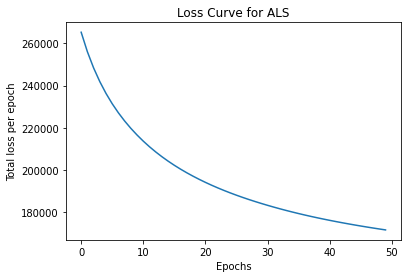

In [ ]:
plt.plot(loss)
plt.xlabel('Epochs')
plt.ylabel('Total loss per epoch')
plt.title("Loss Curve for ALS")
plt.show()

In [ ]:
X_hat = torch.matmul(u_matrix, v_matrix.T)

In [ ]:
X_matrix_no_nan

tensor([[4.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [2.5000, 2.0000, 2.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],
       device='cuda:0', dtype=torch.float64)

In [ ]:
test_index_df

,userId,movieId,rating,timestamp
7545,51,1997,5.0,1230932340
55013,365,51662,3.5,1488333581
96199,603,380,2.0,954482760
52534,343,1089,4.5,1202061357
8085,57,382,2.0,972175120
...,...,...,...,...
18262,116,3,3.5,1337200325
9962,65,46976,3.5,1494767179
11296,68,46976,4.0,1208743307
48498,313,3386,3.0,1030556084


In [ ]:
X_matrix_data

movieId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,34,36,38,39,40,41,42,43,...,185135,185435,185473,185585,186587,187031,187541,187593,187595,187717,188189,188301,188675,188751,188797,188833,189043,189111,189333,189381,189547,189713,190183,190207,190209,190213,190215,190219,190221,191005,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,4.0,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.5,NaN,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,2.5,NaN,NaN,NaN,3.5,NaN,0.0,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,4.5,NaN,NaN,4.0,NaN,3.5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,2.5,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,2.0,NaN,3.5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.5,3.5,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
X_hat_df = pd.DataFrame(X_hat.cpu().numpy())

In [ ]:
X_hat_df.columns = X_matrix_data.columns
X_hat_df.index = X_matrix_data.index

In [ ]:
analysis = list()
for row in range(len(test_index_df)):
    u, m, true_rating = test_index_df.iloc[row][['userId', 'movieId', 'rating']]
    pivot_rating = X_matrix_data.loc[u,m]
    pred_rating = X_hat_df.loc[u,m]

    column_movie = X_matrix_data.loc[:,m]
    total_count = X_matrix_data.loc[:,m].value_counts().sum()
    zero_count = np.count_nonzero(column_movie.values==0)

    avg_rating = X_matrix_data.loc[:,m].sum() / (total_count-zero_count)
    analysis.append([u, m, true_rating, pred_rating, pivot_rating, avg_rating])

In [ ]:
analysis_df = pd.DataFrame(analysis)
analysis_df.columns = ['userId', 'movieId', 'true rating', 'predicted rating', 'matrix_rating', 'average_baseline_rating']

In [ ]:
analysis_df

,userId,movieId,true rating,predicted rating,matrix_rating,average_baseline_rating
0,51.0,1997.0,5.0,2.467719,0.0,3.728571
1,365.0,51662.0,3.5,1.524690,0.0,3.663636
2,603.0,380.0,2.0,1.289489,0.0,3.471074
3,343.0,1089.0,4.5,0.790867,0.0,4.144444
4,57.0,382.0,2.0,1.816554,0.0,3.333333
...,...,...,...,...,...,...
25204,116.0,3.0,3.5,1.029357,0.0,3.308824
25205,65.0,46976.0,3.5,0.746613,0.0,3.703704
25206,68.0,46976.0,4.0,0.692878,0.0,3.703704
25207,313.0,3386.0,3.0,0.572164,0.0,3.454545


In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(analysis_df['true rating'], analysis_df['predicted rating'])

7.094837674703059

In [ ]:
mean_squared_error(analysis_df['true rating'], analysis_df['average_baseline_rating'])

0.8911735847430426

In [ ]:
analysis_df.to_csv('k10_analysis_epoch_50.csv')